In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import sys
import common_functions as cf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR

In [11]:
prediction_week = 30

In [4]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
dp = cf.DataPreprocesser(weather_path, demand_path, solar_path)
dp.load_df()
dp.remove_nan()
dp.interpolate_df()
dp.set_df(dp.df[dp.df['week']!=44])
dp.df.head()

/home/raph/project/westernpower/westernpower/task0/common_functions.py:37: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,0.0,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0


100%|██████████| 5/5 [08:06<00:00, 97.28s/it] 
{'best_model': RandomForestRegressor(), 'best_scores': 0.8498671292898645, 'best_parameters': {'n_estimators': 300}}
{'SVR': {'best_model': SVR(), 'best_scores': 0.8102040965351437, 'best_parameters': {'C': 1.0, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'rbf'}}, 'KNeighborsRegressor': {'best_model': KNeighborsRegressor(), 'best_scores': 0.8123548272815697, 'best_parameters': {'n_neighbors': 27}}, 'GradientBoostingRegressor': {'best_model': GradientBoostingRegressor(), 'best_scores': 0.84005382153272, 'best_parameters': {'learning_rate': 0.15, 'loss': 'ls', 'n_estimators': 150}}, 'Lasso, Ridge, ElasticNet': {'best_model': Ridge(), 'best_scores': 0.8064475208667512, 'best_parameters': {'alpha': 1.0}}, 'RandomForestRegressor': {'best_model': RandomForestRegressor(), 'best_scores': 0.8498671292898645, 'best_parameters': {'n_estimators': 300}}}
{'best_model': RandomForestRegressor(), 'best_scores': 0.8498671292898645, 'best_parameters': {'n_

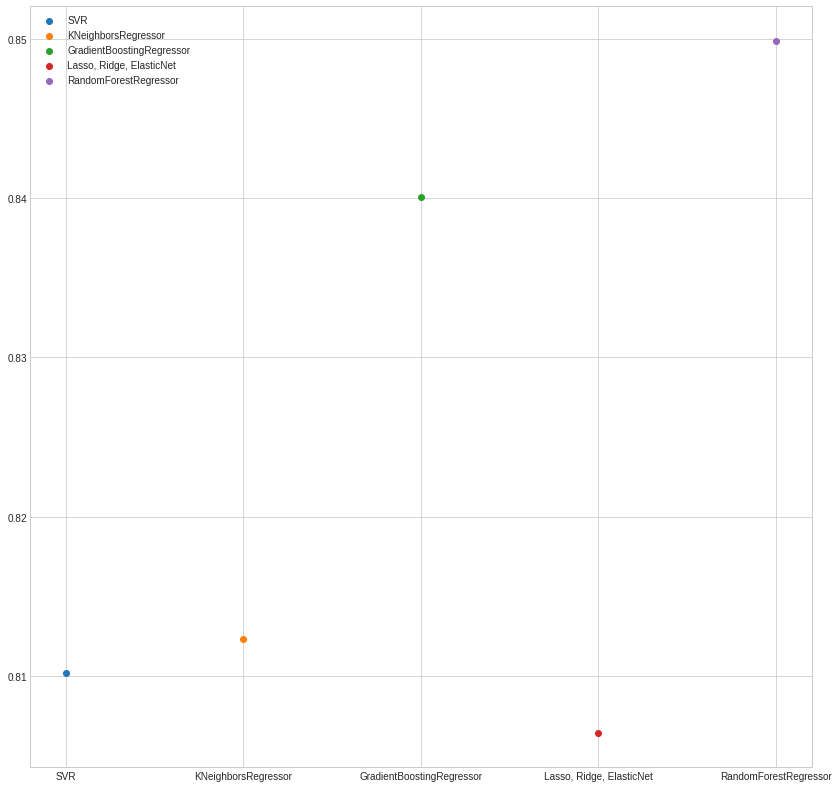

In [7]:
weather_columns = dp.get_columns_of_group_names(['temp', 'solar'], [1,2])
weather_columns.append('sp')
X,y = dp.build_input_for_ml_algo(weather_columns, ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
ml_researcher = cf.MachineLearningResearcher(X_train,y_train)
with tqdm(total=len(ml_researcher.models), file=sys.stdout) as pbar:
    for model_name in ml_researcher.models:
        ml_researcher.get_best_scores_and_params_of_ml_algos(model_name)
        pbar.update()
print(ml_researcher.get_best_model_with_best_score())
print(ml_researcher.scores)
print(ml_researcher.get_best_model_with_best_score())
ml_researcher.display_ml_algo_scores()
# models_bests_scores_and_params = {}
# ml_researcher = MachineLearningResearcher
# ml_researcher.param_grids

In [8]:
ml_predictor = cf.MLPredictor(dp,prediction_week)
ml_predictor.get_demand_previous_week()
ml_predictor.get_weather_prediction(weather_path)
ml_predictor.predict_solar_power_from_weather(RandomForestRegressor(random_state=2019, n_estimators = 300))

/home/raph/project/westernpower/westernpower/task0/common_functions.py:254: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  demand_prediction['week']=demand_prediction.index.week


,demand_MW,week,dow,hour,sp,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,pv_power_mw
datetime,,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,1.73,30.0,0.0,0.0,1.0,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,1.62,30.0,0.0,0.0,2.0,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,1.56,30.0,0.0,1.0,3.0,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,1.48,30.0,0.0,1.0,4.0,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,1.48,30.0,0.0,2.0,5.0,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30.0,6.0,21.0,44.0,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,2.15,30.0,6.0,22.0,45.0,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,1.93,30.0,6.0,22.0,46.0,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bpd = cf.BatteryPowerDispatcher
B= bpd.get_all_dispatch_in_a_week(bpd,ml_predictor.predicted_df, prediction_week)
print(B.head())
print(B.sum())

  3000 3001 3002 3003 3004 3005 3006
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3000    0.06
3001    0.02
3002    0.02
3003    0.02
3004     0.0
3005    0.07
3006    0.08
dtype: object


In [14]:
B_final = bpd.format_dispatching_for_competition(B, ml_predictor.predicted_df.index)
B_final.to_csv('Output/test_raph/pred1.csv')